In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,  RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')


In [2]:
#reading the first five rows
df=pd.read_csv("/content/drive/MyDrive/train_small.csv", nrows=100000)
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
#checking the diamention of the dataset
df.shape

(100000, 54)

In [4]:
# printing the numbeer of columns
df.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'user_hist_stars', 'user_hist_paid', 'listing_country_id', 'listing_id',
       'listing_stars', 'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'log_click_proportion', 'distance_to_dest',
       'random_sort', 'competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff', 'competitor2_rate',
       'competitor2_has_availability', 'competitor2_price_percent_diff',
       'competitor3_rate', 'competitor3_has_availability',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability',
       'competitor5_price_percent_diff',

In [6]:
#checking the missing values
df.isnull().sum()/len(df)*100

search_id                          0.000
timestamp                          0.000
site_id                            0.000
user_country_id                    0.000
user_hist_stars                   94.619
user_hist_paid                    94.619
listing_country_id                 0.000
listing_id                         0.000
listing_stars                      0.000
listing_review_score               0.130
is_brand                           0.000
location_score1                    0.000
location_score2                   21.442
log_historical_price               0.000
listing_position                   0.000
price_usd                          0.000
has_promotion                      0.000
destination_id                     0.000
length_of_stay                     0.000
booking_window                     0.000
num_adults                         0.000
num_kids                           0.000
num_rooms                          0.000
stay_on_saturday                   0.000
log_click_propor

In [ ]:
#converting string into date time column
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']


0       2012-12-31 08:59:22
1       2012-12-31 08:59:22
2       2012-12-31 08:59:22
3       2012-12-31 08:59:22
4       2012-12-31 08:59:22
                ...        
99995   2012-11-16 21:40:08
99996   2012-11-16 21:40:08
99997   2012-11-16 21:40:08
99998   2012-11-16 21:40:08
99999   2012-11-16 21:40:08
Name: timestamp, Length: 100000, dtype: datetime64[ns]

In [ ]:
#extracting year from timestamp
df['year'] = pd.to_datetime(df['timestamp']).dt.year
df['year']

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
99995    2012
99996    2012
99997    2012
99998    2012
99999    2012
Name: year, Length: 100000, dtype: int64

In [ ]:
#extracting month from timestamp
df['month'] = pd.to_datetime(df['timestamp']).dt.month
df['month']

0        12
1        12
2        12
3        12
4        12
         ..
99995    11
99996    11
99997    11
99998    11
99999    11
Name: month, Length: 100000, dtype: int64

In [ ]:
# dropping the irrelevant columns
col=['booking_value', 'log_click_proportion','timestamp','search_id','site_id', 'user_country_id', 'user_hist_stars', 'user_hist_paid','listing_country_id',
     'listing_id', 'listing_stars','listing_review_score','location_score1','location_score2', 'log_historical_price', 'listing_position',
     'destination_id', 'length_of_stay','distance_to_dest','competitor1_rate', 'competitor1_has_availability','competitor1_price_percent_diff',
     'competitor2_rate','competitor2_has_availability', 'competitor2_price_percent_diff','competitor3_rate','competitor3_has_availability',
     'competitor3_price_percent_diff', 'competitor4_rate','competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability','competitor5_price_percent_diff', 'competitor6_rate','competitor6_has_availability', 
     'competitor6_price_percent_diff','competitor7_rate', 'competitor7_has_availability','competitor7_price_percent_diff', 'competitor8_rate',
     'competitor8_has_availability', 'competitor8_price_percent_diff']
df = df.drop(col, axis=1)

In [ ]:
df.head()

,is_brand,price_usd,has_promotion,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,random_sort,clicked,booked,year,month
0,0,295.0,0,46,1,0,1,1,1,0,0,2012,12
1,0,299.0,0,46,1,0,1,1,1,0,0,2012,12
2,1,373.0,1,46,1,0,1,1,1,0,0,2012,12
3,0,329.0,0,46,1,0,1,1,1,0,0,2012,12
4,0,600.0,0,46,1,0,1,1,1,0,0,2012,12


In [ ]:
# To know more about the datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   is_brand          100000 non-null  int64  
 1   price_usd         100000 non-null  float64
 2   has_promotion     100000 non-null  int64  
 3   booking_window    100000 non-null  int64  
 4   num_adults        100000 non-null  int64  
 5   num_kids          100000 non-null  int64  
 6   num_rooms         100000 non-null  int64  
 7   stay_on_saturday  100000 non-null  int64  
 8   random_sort       100000 non-null  int64  
 9   clicked           100000 non-null  int64  
 10  booked            100000 non-null  int64  
 11  year              100000 non-null  int64  
 12  month             100000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.9 MB


In [ ]:
# To understand some statistical measurements
df.describe()

,is_brand,price_usd,has_promotion,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,random_sort,clicked,booked,year,month
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.642680,199.174000,0.215000,36.827360,1.95104,0.346130,1.10449,0.502210,0.299260,0.045320,0.027610,2012.799190,5.172110
std,0.479213,2039.638371,0.410824,50.644796,0.84550,0.709344,0.39874,0.499998,0.457936,0.208006,0.163853,0.400608,3.516324
min,0.000000,0.690000,0.000000,0.000000,1.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,0.000000,85.340000,0.000000,4.000000,2.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000
50%,1.000000,123.000000,0.000000,17.000000,2.00000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,2013.000000,4.000000
75%,1.000000,186.000000,0.000000,47.000000,2.00000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,2013.000000,6.000000
max,1.000000,258254.510000,1.000000,364.000000,9.00000,6.000000,8.00000,1.000000,1.000000,1.000000,1.000000,2013.000000,12.000000


In [ ]:
#checking the null values
df.isnull().sum()

is_brand            0
price_usd           0
has_promotion       0
booking_window      0
num_adults          0
num_kids            0
num_rooms           0
stay_on_saturday    0
random_sort         0
clicked             0
booked              0
year                0
month               0
dtype: int64

In [ ]:
X = df.drop('booked',axis=1)
Y = df['booked']


Feature Selection

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=5)
fit = BestFeatures.fit(X,Y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes 

f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score'] 
f_Scores

,Specs,Score
0,is_brand,1.256417
1,price_usd,7860.272721
2,has_promotion,81.116453
3,booking_window,2906.234413
4,num_adults,0.158584
5,num_kids,1.664998
6,num_rooms,1.821976
7,stay_on_saturday,0.877564
8,random_sort,559.148254
9,clicked,57102.046110


In [ ]:
# print 10 best features in descending order
print(f_Scores.nlargest(6,'Score'))

             Specs         Score
9          clicked  57102.046110
1        price_usd   7860.272721
3   booking_window   2906.234413
8      random_sort    559.148254
2    has_promotion     81.116453
11           month      2.513038


In [ ]:
#checking the skewness
df.skew()

is_brand            -0.595489
price_usd           72.153486
has_promotion        1.387482
booking_window       2.347770
num_adults           2.339620
num_kids             2.335835
num_rooms            6.258685
stay_on_saturday    -0.008840
random_sort          0.876734
clicked              4.371883
booked               5.766121
year                -1.493709
month                0.852843
dtype: float64

In [ ]:
df['booked'].value_counts()

0    97239
1     2761
Name: booked, dtype: int64

In [ ]:
#checking the correlation 
df.corr()

,is_brand,price_usd,has_promotion,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,random_sort,clicked,booked,year,month
is_brand,1.000000,-0.006623,-0.101926,-0.098115,0.016205,0.017796,0.016257,0.079756,-0.033805,-0.004276,0.005930,-0.007675,0.017203
price_usd,-0.006623,1.000000,0.025047,-0.005148,-0.012062,0.016953,0.041693,-0.017207,-0.006032,-0.003049,-0.001940,0.008430,-0.006723
has_promotion,-0.101926,0.025047,1.000000,0.026435,0.015507,0.003164,0.016816,-0.048319,-0.028762,0.037052,0.032145,-0.010304,0.004836
booking_window,-0.098115,-0.005148,0.026435,1.000000,0.119342,0.056369,0.048783,-0.090619,0.146233,-0.000740,-0.020428,0.039359,-0.075062
num_adults,0.016205,-0.012062,0.015507,0.119342,1.000000,0.053967,0.414100,0.089293,0.049000,0.006760,-0.002080,0.050805,-0.037027
num_kids,0.017796,0.016953,0.003164,0.056369,0.053967,1.000000,0.109612,0.000677,0.006610,0.004293,0.003384,0.057594,-0.043649
num_rooms,0.016257,0.041693,0.016816,0.048783,0.414100,0.109612,1.000000,-0.006801,-0.004653,0.010785,0.011250,0.024181,-0.014474
stay_on_saturday,0.079756,-0.017207,-0.048319,-0.090619,0.089293,0.000677,-0.006801,1.000000,-0.013283,-0.000194,0.004199,0.005885,-0.012613
random_sort,-0.033805,-0.006032,-0.028762,0.146233,0.049000,0.006610,-0.004653,-0.013283,1.000000,0.005118,-0.089327,-0.005918,0.001766
clicked,-0.004276,-0.003049,0.037052,-0.000740,0.006760,0.004293,0.010785,-0.000194,0.005118,1.000000,0.773387,0.002289,-0.002844


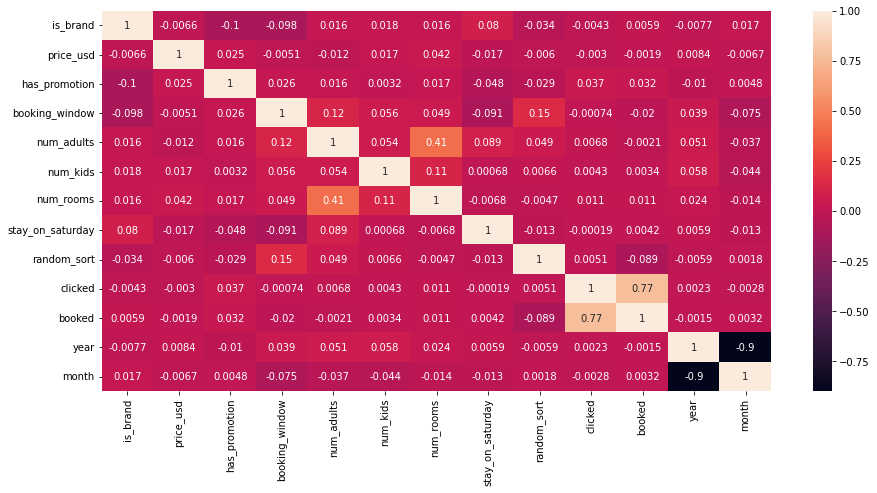

In [ ]:
#plotting the correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

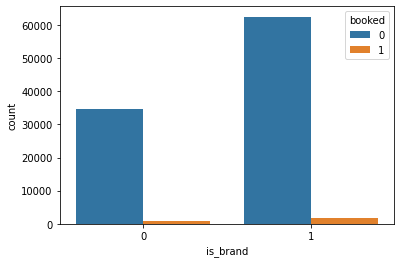

In [ ]:
sns.countplot(x='is_brand',hue='booked', data=df)

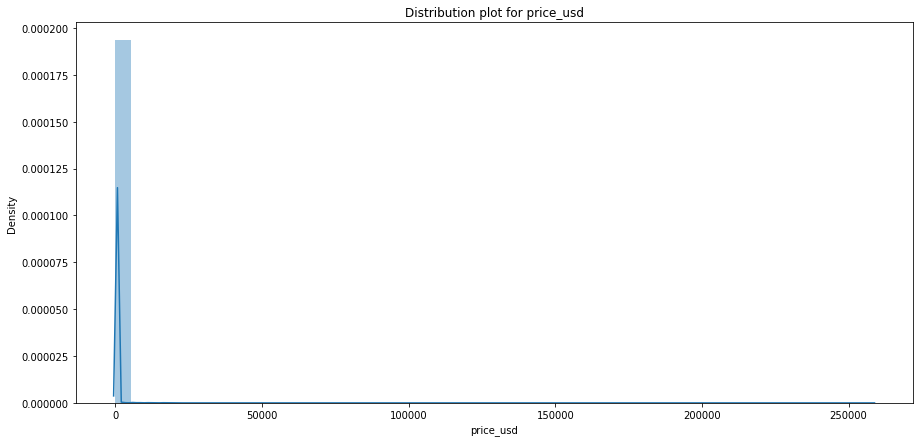

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df['price_usd'])
plt.title("Distribution plot for price_usd")
plt.show()

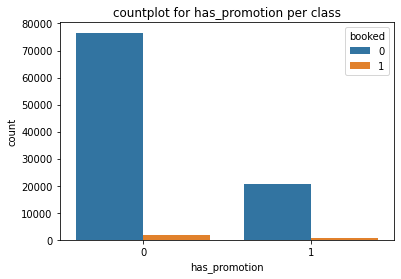

In [ ]:
sns.countplot(x='has_promotion', hue='booked', data=df)
plt.title("countplot for has_promotion per class")
plt.show()

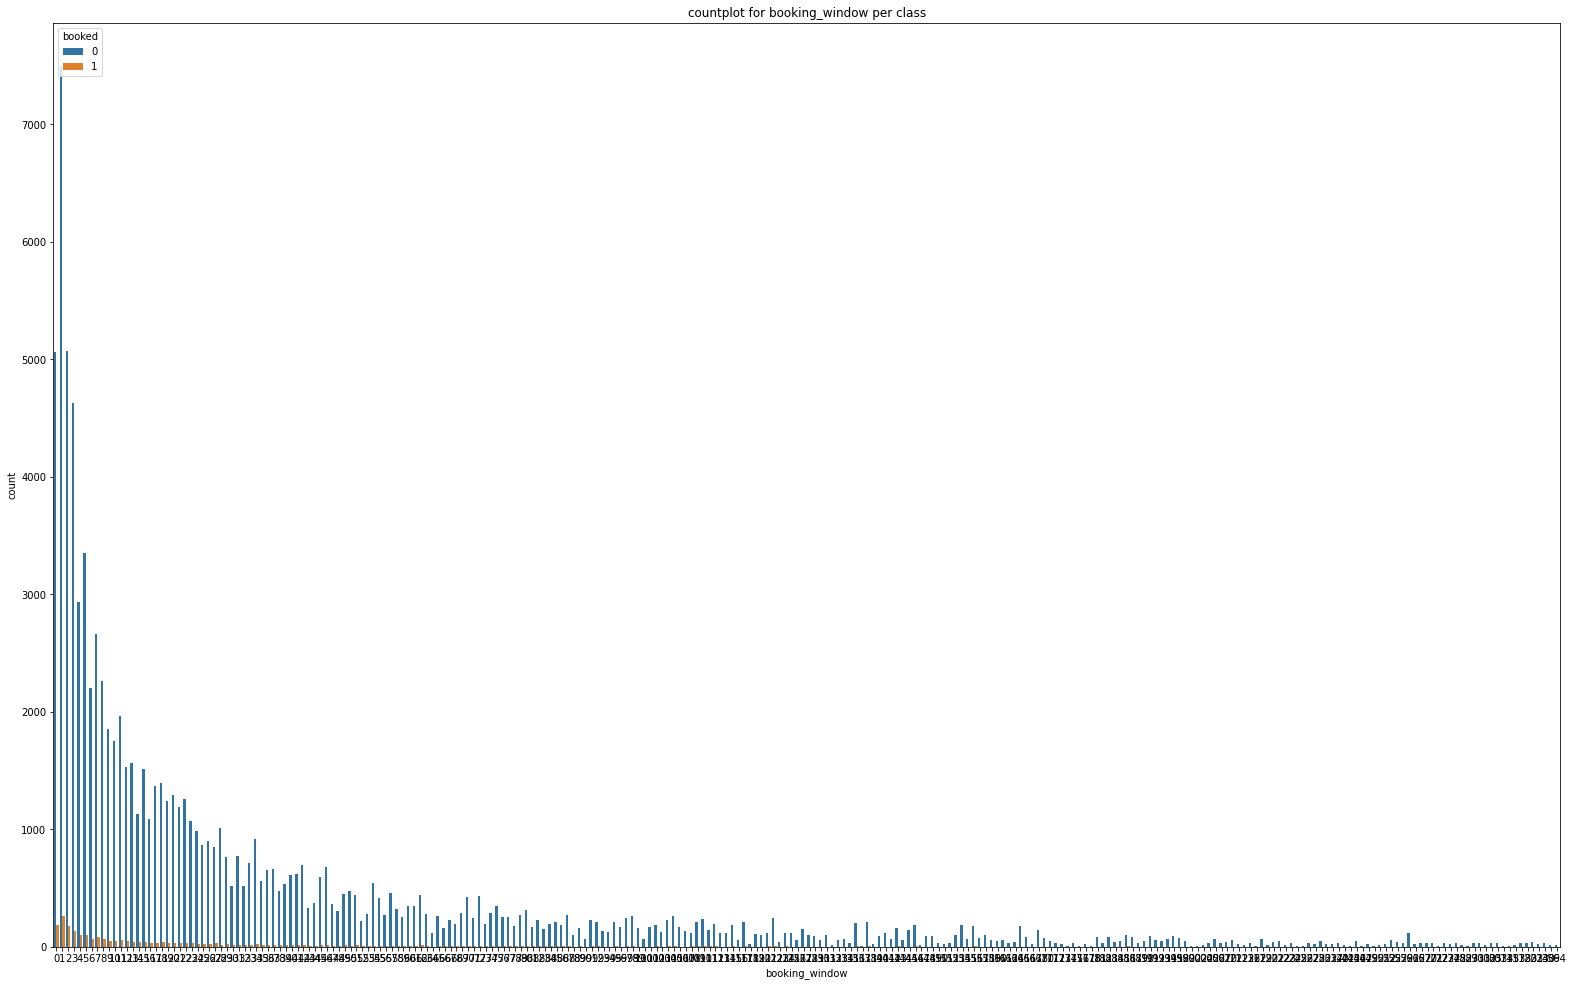

In [ ]:
plt.figure(figsize=(27,17))
sns.countplot(x='booking_window', hue='booked', data=df)
plt.title("countplot for booking_window per class")
plt.show()

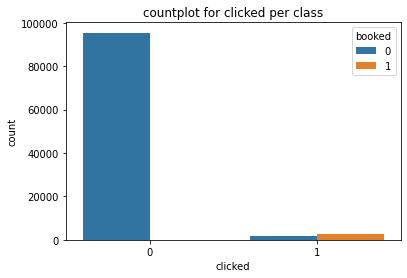

In [ ]:
sns.countplot(x='clicked', hue='booked', data=df)
plt.title("countplot for clicked per class")
plt.show()

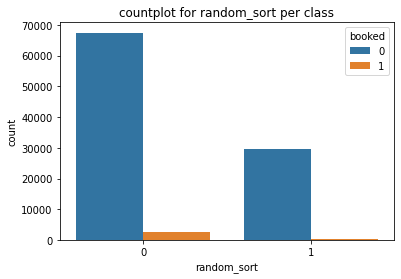

In [ ]:
sns.countplot(x='random_sort', hue='booked', data=df)
plt.title("countplot for random_sort per class")
plt.show()

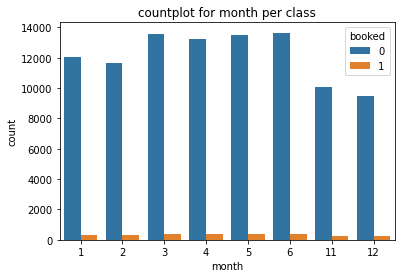

In [ ]:
sns.countplot(x='month', hue='booked', data=df)
plt.title("countplot for month per class")
plt.show()

In [ ]:
col = ['clicked','price_usd','booking_window','random_sort','has_promotion','month']
x=df[col]
y=df['booked']

In [ ]:
print(x)

       clicked  price_usd  booking_window  random_sort  has_promotion  month
0            0     295.00              46            1              0     12
1            0     299.00              46            1              0     12
2            0     373.00              46            1              1     12
3            0     329.00              46            1              0     12
4            0     600.00              46            1              0     12
...        ...        ...             ...          ...            ...    ...
99995        0     182.78               6            1              0     11
99996        0     118.86               6            1              1     11
99997        0      97.88               6            1              0     11
99998        0      74.91               6            1              1     11
99999        0     195.77               6            1              0     11

[100000 rows x 6 columns]


In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: booked, Length: 100000, dtype: int64


Oversampling

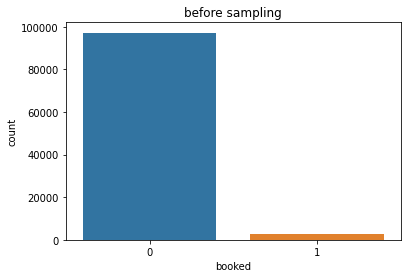

In [ ]:
# plot before sampling
sns.countplot(df['booked'])
plt.title("before sampling")
plt.show()

In [ ]:
# Oversampling
ros = RandomOverSampler(random_state=42)
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [ ]:
x_resampled, y_resampled  = ros.fit_resample(x,y)


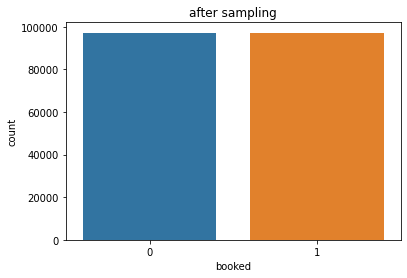

In [ ]:
# plot after sampling
sns.countplot(y_resampled)
plt.title("after sampling")
plt.show()

In [ ]:
#Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 8)
print(x.shape, x_train.shape, x_test.shape)

(100000, 6) (155582, 6) (38896, 6)


Feature Selection

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.00000000e+00 1.13961528e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.15510392e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.44164373e-03 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 3.76335188e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.09090909e-01]
 [1.00000000e+00 2.87391683e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.09090909e-01]
 [1.00000000e+00 7.55380888e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.09090909e-01]]


PCA

In [ ]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9910336671337301
Accuracy on test data: 0.9776840806252571


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[19337   699]
 [  169 18691]]


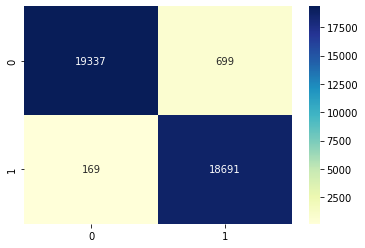

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     20036
           1       0.96      0.99      0.98     18860

    accuracy                           0.98     38896
   macro avg       0.98      0.98      0.98     38896
weighted avg       0.98      0.98      0.98     38896



In [ ]:
# cross validation score
scores = cross_val_score(LR, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.99061606 0.99042324 0.99093714 0.99151562 0.99167631]
0.99 accuracy with a standard deviation of 0.00


In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = LR.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
LR_roc_auc = roc_auc_score(y_test, LR.predict(x_test))
LR_roc_auc

0.9776432445615045

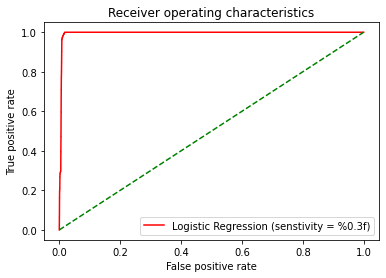

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (senstivity = %0.3f)',color='r' %LR_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [ ]:
#accuracy on training data
x_train_prediction = NB.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = NB.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9734737951691069
Accuracy on test data: 0.9736219662690251


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     20212
           1       0.96      0.99      0.97     18684

    accuracy                           0.97     38896
   macro avg       0.97      0.97      0.97     38896
weighted avg       0.97      0.97      0.97     38896



In [ ]:
# cross validation score
scores = cross_val_score(NB, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.97265161 0.97348716 0.97348631 0.97448258 0.97303638]
0.97 accuracy with a standard deviation of 0.00


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[19346   866]
 [  160 18524]]


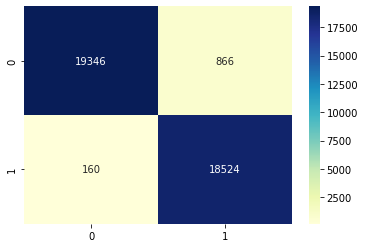

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = NB.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
NB_roc_auc = roc_auc_score(y_test, NB.predict(x_test))
NB_roc_auc

0.9735675993321794

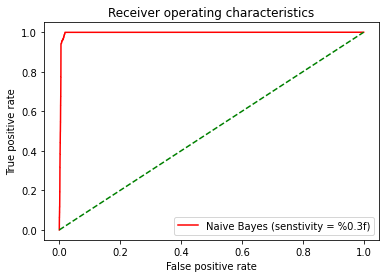

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (senstivity = %0.3f)',color='r' %NB_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = DT.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = DT.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9998907328611278
Accuracy on test data: 0.872506170300288


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     24239
           1       0.75      0.99      0.85     14657

    accuracy                           0.87     38896
   macro avg       0.87      0.90      0.87     38896
weighted avg       0.90      0.87      0.87     38896



In [ ]:
# cross validation score
scores = cross_val_score(DT, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.99694701 0.99675419 0.99697905 0.99752539 0.99755753]
1.00 accuracy with a standard deviation of 0.00


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[19393  4846]
 [  113 14544]]


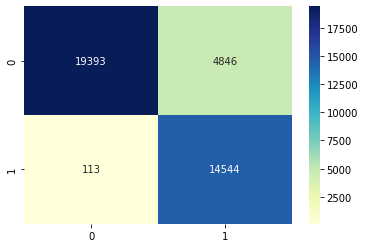

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = DT.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
DT_roc_auc = roc_auc_score(y_test, DT.predict(x_test))
DT_roc_auc

0.8721421350788933

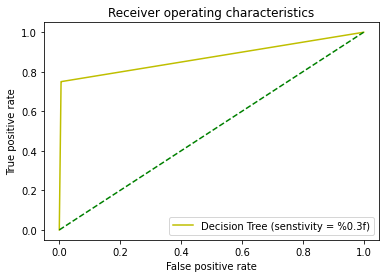

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (senstivity = %0.3f)',color='y' %NB_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = RF.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9998907328611278
Accuracy on test data: 0.9624125874125874


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     20768
           1       0.93      0.99      0.96     18128

    accuracy                           0.96     38896
   macro avg       0.96      0.96      0.96     38896
weighted avg       0.96      0.96      0.96     38896



In [ ]:
# cross validation score
scores = cross_val_score(RF, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.99681846 0.99681846 0.99675408 0.99768608 0.99730042]
1.00 accuracy with a standard deviation of 0.00


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)

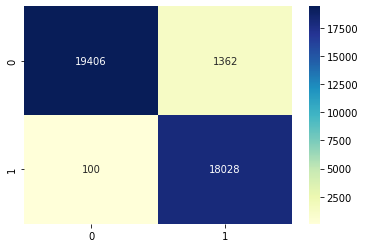

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = RF.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
RF_roc_auc = roc_auc_score(y_test, RF.predict(x_test))
RF_roc_auc

0.9623154896548144

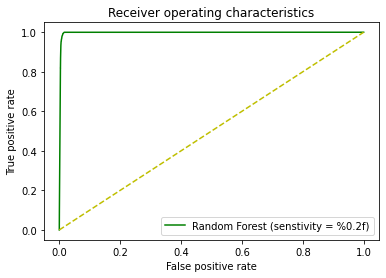

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (senstivity = %0.2f)',color='g' %RF_roc_auc)
plt.plot([0,1],[0,1], 'y--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

XGB

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = xgb.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = xgb.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.992081346171151
Accuracy on test data: 0.9902046482928836


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19235
           1       1.00      0.98      0.99     19661

    accuracy                           0.99     38896
   macro avg       0.99      0.99      0.99     38896
weighted avg       0.99      0.99      0.99     38896



In [ ]:
# cross validation score
scores = cross_val_score(xgb, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.99141948 0.99158017 0.99180486 0.99222265 0.99238334]
0.99 accuracy with a standard deviation of 0.00


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)



[[19180    55]
 [  326 19335]]


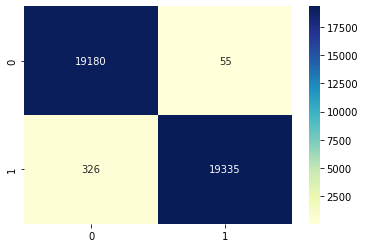

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = xgb.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
xgb_roc_auc

0.990225340008578

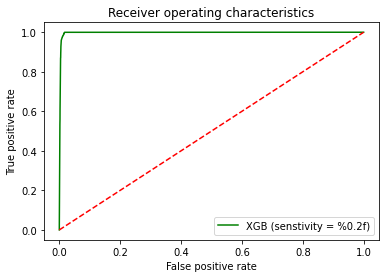

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='XGB (senstivity = %0.2f)',color='g' %RF_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

KNN

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = KNN.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = KNN.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9894010875294057
Accuracy on test data: 0.612582270670506


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71     32911
           1       0.27      0.86      0.41      5985

    accuracy                           0.61     38896
   macro avg       0.61      0.71      0.56     38896
weighted avg       0.85      0.61      0.67     38896



In [ ]:
# cross validation score
scores = cross_val_score(KNN, x_train,y_train,cv=5)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.97695793 0.97644374 0.97711788 0.97618589 0.97666795]
0.98 accuracy with a standard deviation of 0.00


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[18674 14237]
 [  832  5153]]


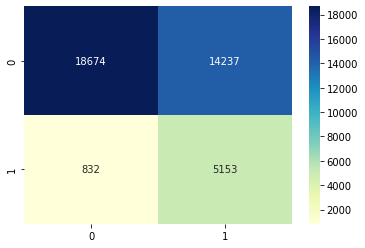

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = KNN.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
KNN_roc_auc = roc_auc_score(y_test, KNN.predict(x_test))
KNN_roc_auc

0.6115510007975753

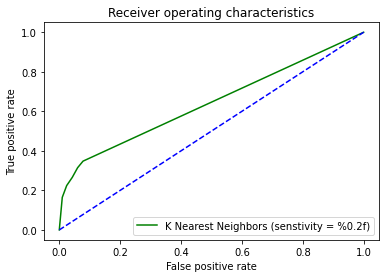

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbors (senstivity = %0.2f)',color='g' %KNN_roc_auc)
plt.plot([0,1],[0,1], 'b--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

Hyper Parameter Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

RF_tuned = RandomForestClassifier(random_state=42)

RF_cv = RandomizedSearchCV(
    estimator=RF_tuned, param_distributions=param_dist, cv=5, random_state=42)

RF_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [ ]:
print("Best score: ", RF_cv.best_score_)
print("Best parameters: ", RF_cv.best_params_)

Best score:  0.9971397750507611
Best parameters:  {'n_estimators': 110, 'max_depth': 40}


In [ ]:
RF_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [ ]:
RF_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [ ]:
#accuracy on training data
x_train_prediction = RF_best.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF_best.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9998521679885848
Accuracy on test data: 0.8976244343891403


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     23358
           1       0.80      1.00      0.89     15538

    accuracy                           0.90     38896
   macro avg       0.90      0.91      0.90     38896
weighted avg       0.92      0.90      0.90     38896

